In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-08 01:03:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.2’

laptops.csv.2       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-08 01:03:18 (7.83 MB/s) - ‘laptops.csv.2’ saved [298573/298573]



In [ ]:
import pandas as pd
df = pd.read_csv('laptops.csv')

In [ ]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
df_numeric

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


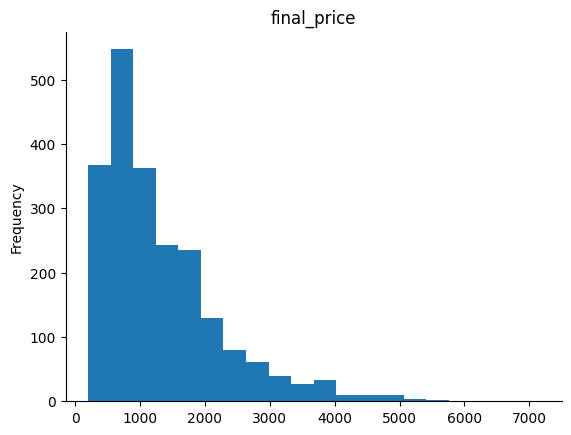

In [ ]:
from matplotlib import pyplot as plt
df_numeric['final_price'].plot(kind='hist', bins=20, title='final_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

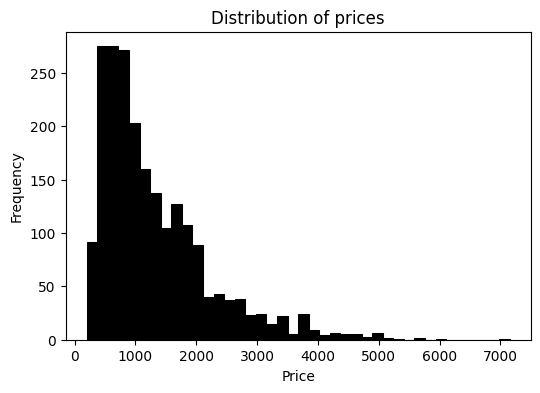

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [ ]:
df_numeric.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


In [ ]:
df_numeric['ram'].median()

16.0

# Validation Framework

In [ ]:
import numpy as np

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good


In [ ]:
n = len(df_numeric)
n

2160

In [ ]:
np.random.seed(42)
n = len(df_numeric)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n, n_train, n_val, n_test

(2160, 1296, 432, 432)

In [ ]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [ ]:
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [ ]:
df_shuffled = df_numeric.iloc[idx]
df_shuffled

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1638,8,512,15.0,1838.29
1095,8,256,15.6,531.80
1130,8,256,13.3,765.33
1294,8,512,14.0,803.61


In [ ]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [ ]:
len(y_train), len(y_val), len(y_test)

(1296, 432, 432)

In [ ]:
df_train.isnull().sum(), df_val.isnull().sum(), df_test.isnull().sum()

(ram        0
 storage    0
 screen     3
 dtype: int64,
 ram        0
 storage    0
 screen     1
 dtype: int64,
 ram        0
 storage    0
 screen     0
 dtype: int64)

# Option with zeros

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
base = ['ram', 'storage', 'screen']

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)

In [ ]:
len(y_pred),len(y_train)

(1296, 1296)

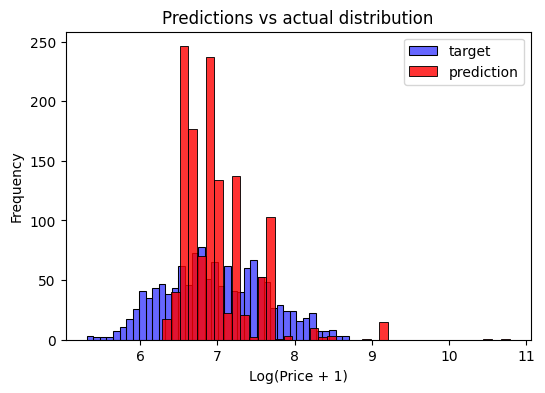

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [190]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse), 2)

In [ ]:
score = rmse(y_train, y_pred)
round(score, 2)

0.45

# Option with mean

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
base = ['ram', 'storage', 'screen']

In [ ]:
df_train['screen'].mean()

15.163534416086618

In [ ]:
def prepare_X(df):
    df_num = df[base]
    mean = df_train['screen'].mean()
    df_num['screen'] = df_num['screen'].fillna(mean)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)

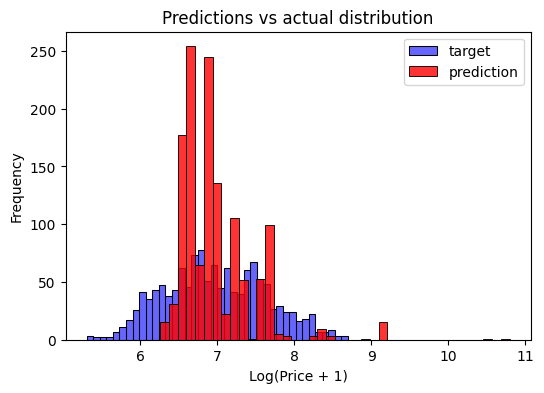

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
score = rmse(y_train, y_pred)
round(score, 2)

0.45

# Question 4 Regularized Linear Regression


In [177]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [199]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)

    y_pred_train = w_0 + X_train.dot(w)
    rmse_train = rmse(y_train, y_pred_train)
    print(f'train r: {r}: {rmse_train}')

    y_pred_val = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred_val)
    print(f'val r: {r}: {rmse_val}')

train r: 0: 0.45
val r: 0: 0.43
train r: 0.01: 0.45
val r: 0.01: 0.43
train r: 0.1: 0.45
val r: 0.1: 0.43
train r: 1: 0.45
val r: 1: 0.43
train r: 10: 0.53
val r: 10: 0.51


# Question 5 -  No regularization, several seeds

In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

import numpy as np
import pandas as pd
df = pd.read_csv('laptops.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric

--2024-10-08 05:41:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-08 05:41:58 (6.46 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [34]:
def split(df,seed,target):
  np.random.seed(seed)
  n = len(df)
  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()


  y_train = df_train[target].values
  y_val = df_val[target].values
  y_test = df_test[target].values

  del df_train[target]
  del df_val[target]
  del df_test[target]

  return df_train, df_val, df_test, y_train, y_val, y_test

In [35]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [36]:
def prepare_X(df):
  # base = df.select_dtypes(include=['float64', 'int64'])
  df_num = df
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [37]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse), 2)

In [39]:
results = []
for i in range(0,10):
  df_train, df_val, df_test, y_train, y_val, y_test = split(df_numeric,i,'final_price')
  X_train = prepare_X(df_train)
  X_val = prepare_X(df_val)
  w_0, w = train_linear_regression(X_train, y_train)
  y_pred_val = w_0 + X_val.dot(w)
  score = rmse(y_val,y_pred_val)
  results.append(score)

print(f'mean: {np.mean(results)}')
print(f'std: {np.round(np.std(results),3)}')


mean: 589.543
std: 29.176


# Question 6

In [51]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [52]:
  df_train, df_val, df_test, y_train, y_val, y_test = split(df_numeric,9,'final_price')

In [53]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [54]:
df_full_train

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
1723,16,512,14.0
1724,16,512,13.3
1725,8,256,15.6
1726,16,512,15.6


In [55]:
X_full_train = prepare_X(df_full_train)

In [56]:
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [57]:
X_test = prepare_X(df_test)

In [58]:
X_test

array([[  16. ,  512. ,   13.4],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   15. ],
       ...,
       [  32. , 1000. ,   14.2],
       [  16. , 1000. ,   15.6],
       [  32. , 1000. ,   16. ]])

In [59]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([1592.89, 1349.  ,  549.  , ...,  849.  ,  711.94,  779.01])

In [60]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)

In [62]:
y_pred_test = w_0 + X_test.dot(w)
rmse_test = rmse(y_test, y_pred_test)
rmse_test

608.61